In [1]:
import pandas as pd
import numpy as np

import json

from scripts.utils import SimulateData
from stopsignalmetrics.ssrtmodel import SSRTmodel

from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns

# SSRT by SSD

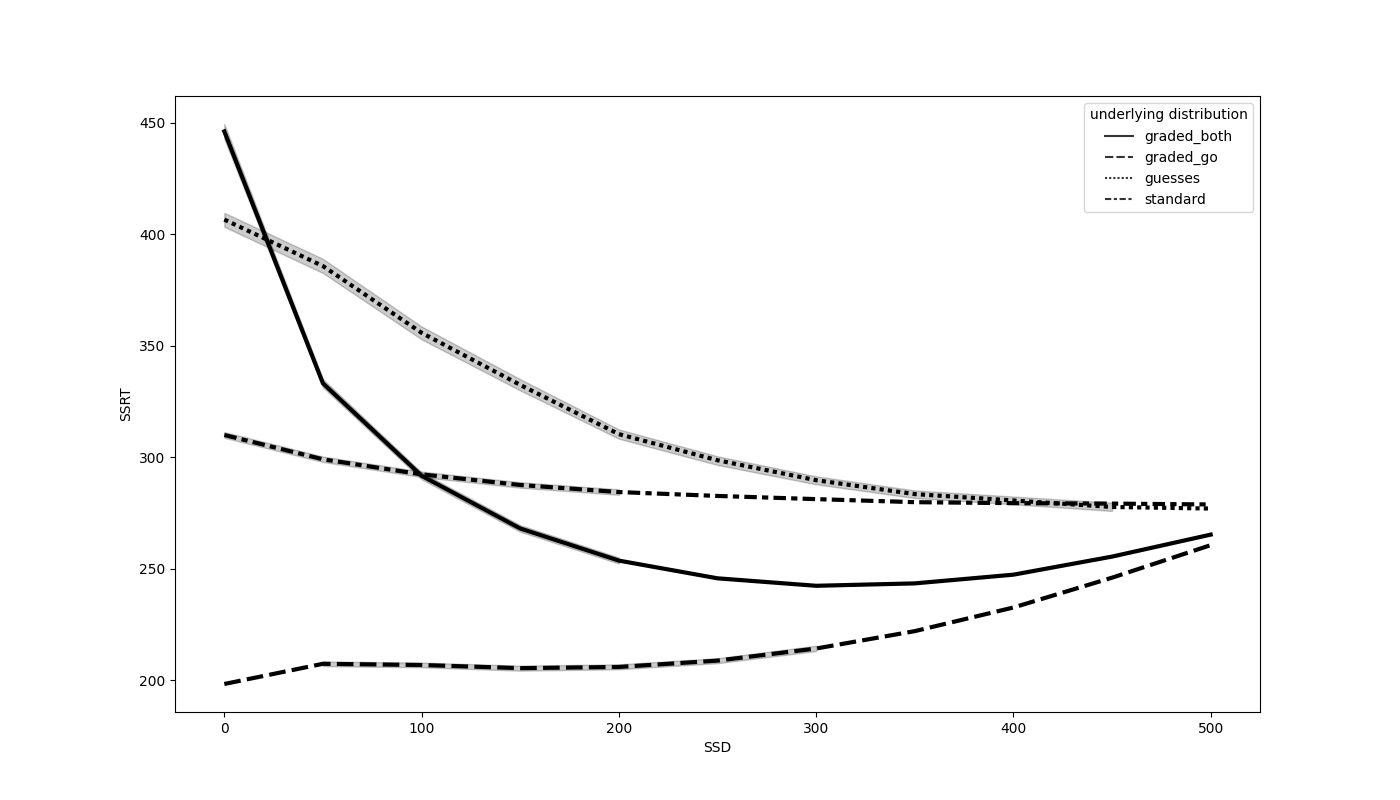

In [2]:
Image('figures/SSRT_by_SSD.png')

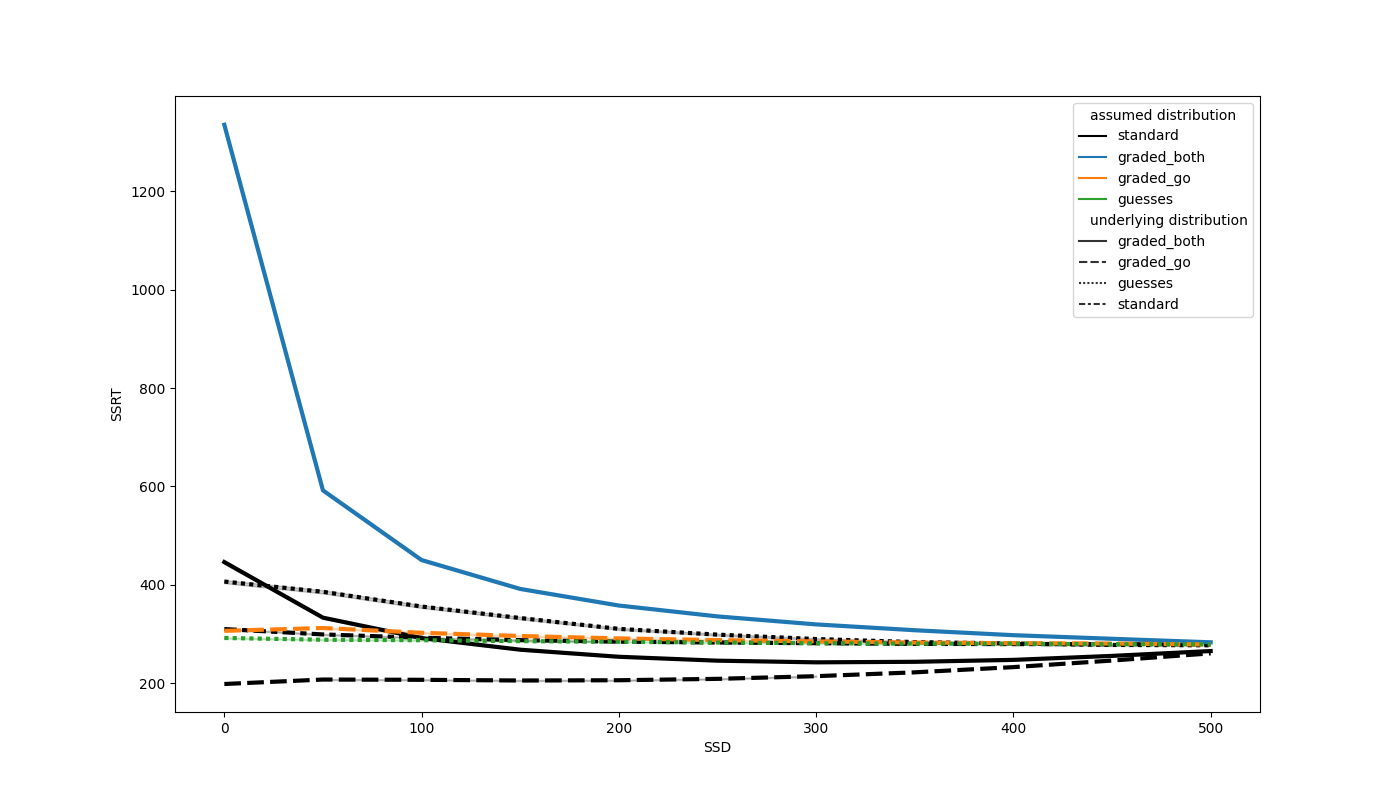

In [3]:
Image('figures/SSRT_by_SSD_supplement.png')

# Inhibition Function

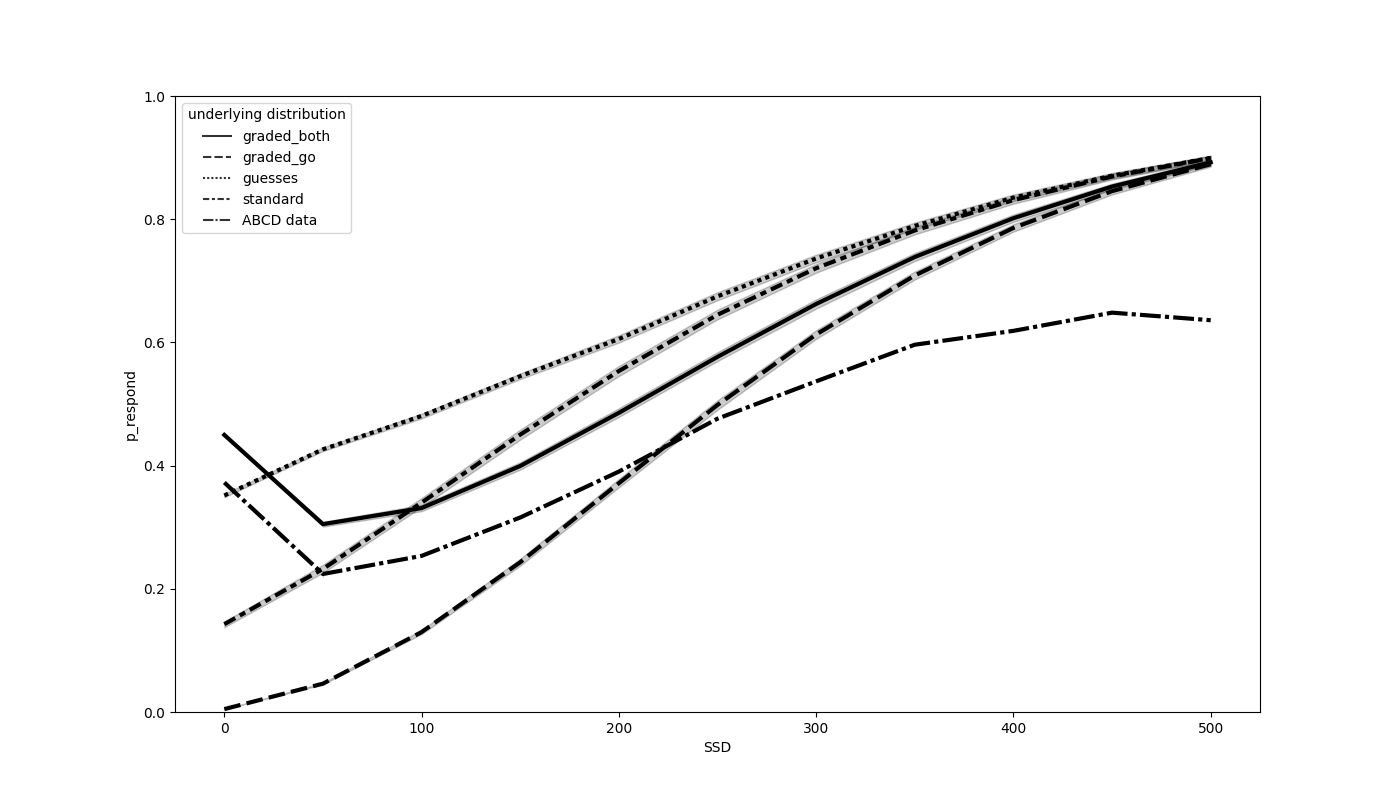

In [4]:
Image('figures/inhibition_function.png')

# Individual Differences

In [5]:
def add_identity(axes, *line_args, **line_kwargs):
    identity, = axes.plot([], [], *line_args, **line_kwargs)
    def callback(axes):
        low_x, high_x = axes.get_xlim()
        low_y, high_y = axes.get_ylim()
        low = max(low_x, low_y)
        high = min(high_x, high_y)
        identity.set_data([low, high], [low, high])
    callback(axes)
    axes.callbacks.connect('xlim_changed', callback)
    axes.callbacks.connect('ylim_changed', callback)
    return axes

In [6]:
df = pd.read_csv('ssrt_metrics/expected_ssrts.csv', index_col=0)

# reformatting - was multiindex
df.columns = [ f'gen-{gen}_SSRT-{ssrt}' for gen, ssrt in zip(df.loc['underlying distribution', :].values, df.columns)]
df = df.drop(['underlying distribution', 'NARGUID'])

for col in df.columns:
    df[col] = df[col].astype(float)


In [7]:
sim_rt_info = pd.read_csv('simulated_data/sim_rt_meanStd.csv', index_col = 0)

In [8]:
# getting expect SSRTs
mus_path = 'abcd_data/assigned_mus.json'
with open(mus_path, 'r') as f:
    mus_dict = json.load(f)
    
mus_df = pd.DataFrame(mus_dict).T

In [9]:
mus_df.head()

,goRT,go,SSRT,stop
003RTV85,459.869390,0.243980,331.395005,0.355372
007W6H7B,368.809477,0.313667,261.141085,0.473617
00CY2MDM,449.321734,0.250425,305.961040,0.390684
00HEV6HB,408.030844,0.279306,306.748683,0.389486
00J52GPG,462.209942,0.242595,277.440297,0.439676


In [10]:
monster_df = pd.concat([mus_df.add_prefix('assigned_'), sim_rt_info, df], 1, sort=True)
monster_df.columns = [col.split('.')[0] for col in monster_df.columns]
monster_df = monster_df.loc[monster_df['gen-standard_SSRT-fixed'].notnull()]

In [11]:
monster_df

,assigned_goRT,assigned_go,assigned_SSRT,assigned_stop,sim_rt_mean,sim_rt_std,gen-graded_both_SSRT-standard,gen-graded_go_SSRT-standard,gen-guesses_SSRT-standard,gen-standard_SSRT-standard,...,gen-guesses_SSRT-graded_both,gen-standard_SSRT-graded_both,gen-graded_both_SSRT-fixed,gen-graded_go_SSRT-fixed,gen-guesses_SSRT-fixed,gen-standard_SSRT-fixed,gen-graded_both_SSRT-tracking,gen-graded_go_SSRT-tracking,gen-guesses_SSRT-tracking,gen-standard_SSRT-tracking
00J52GPG,462.209942,0.242595,277.440297,0.439676,537.5210,216.061634,317.333333,184.150000,321.850000,286.466667,...,739.866667,576.300000,242.0,193.0,284.0,268.0,240.646,174.600,295.006,263.084
00LJVZK2,721.609518,0.148896,305.780200,0.390961,512.0010,196.643602,348.641509,231.358491,408.094340,302.339623,...,642.528302,424.811321,319.0,233.0,414.0,301.0,274.322,230.916,361.918,278.484
00R4TXET,428.356425,0.264301,264.008839,0.467270,529.3815,207.965889,218.050000,172.266667,257.350000,253.100000,...,404.650000,389.983333,228.0,176.0,264.0,246.0,228.542,169.952,269.096,248.720
028WCTG6,698.741252,0.154145,282.382459,0.430325,544.3005,218.878764,271.166667,209.633333,358.833333,280.183333,...,489.950000,372.833333,291.0,220.0,380.0,283.0,250.108,217.408,327.498,267.684
029PWCFY,585.327085,0.186802,305.080990,0.392032,516.4205,196.747987,299.266667,216.833333,362.850000,291.116667,...,584.716667,436.016667,288.0,224.0,366.0,290.0,262.808,213.528,362.310,282.158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZUXHPX3N,521.179033,0.212234,284.035302,0.427286,481.6645,182.295748,234.650000,203.583333,271.150000,267.516667,...,363.516667,351.466667,263.0,202.0,314.0,274.0,247.344,192.114,311.574,264.872
ZWWDT1TG,489.827129,0.227362,284.970016,0.425586,620.1270,271.202340,228.625000,200.857143,269.214286,266.928571,...,365.535714,360.178571,259.0,195.0,298.0,267.0,243.610,190.852,309.824,265.722
ZXF5C635,453.673522,0.247725,252.658296,0.493441,466.2770,167.058153,204.666667,176.233333,242.816667,239.833333,...,341.966667,340.600000,229.0,181.0,263.0,243.0,217.042,157.536,266.662,242.692
ZXPAWB32,516.535546,0.214346,314.139706,0.378588,460.1125,169.012844,252.293103,241.741379,293.310345,295.465517,...,370.568966,367.258621,280.0,218.0,332.0,298.0,268.292,208.892,348.176,286.284


In [13]:
def make_plot_square(ax):
    lowx, highx = ax.get_xlim()
    lowy, highy = ax.get_ylim()
    low = min(lowx, lowy)
    high = max(highx, highy)
    ax.set_xlim((low, high))
    ax.set_ylim((low, high))
    return ax

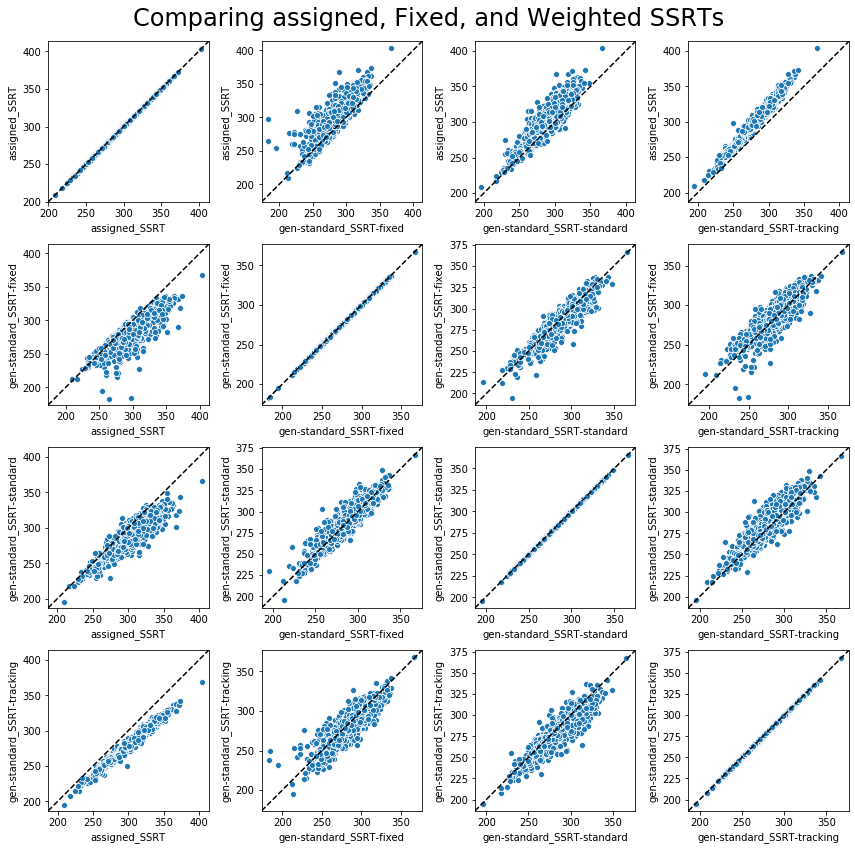

In [14]:
fig, axes = plt.subplots(4, 4, figsize=(12,12))

columns = ['assigned_SSRT', 'gen-standard_SSRT-fixed', 'gen-standard_SSRT-standard', 'gen-standard_SSRT-tracking']
for idx,coli in enumerate(columns):
    for jdx, colj in enumerate(columns):
        ax = sns.scatterplot(x=colj, y=coli, data=monster_df, ax=axes[idx, jdx])
        ax = make_plot_square(ax)
        _ = add_identity(ax, color='k', ls='--')
_ = fig.suptitle('Comparing assigned, Fixed, and Weighted SSRTs', fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=0.94)

In [15]:
monster_df[columns].corr(method='spearman')

,assigned_SSRT,gen-standard_SSRT-fixed,gen-standard_SSRT-standard,gen-standard_SSRT-tracking
assigned_SSRT,1.000000,0.870044,0.900899,0.982580
gen-standard_SSRT-fixed,0.870044,1.000000,0.918620,0.874516
gen-standard_SSRT-standard,0.900899,0.918620,1.000000,0.893854
gen-standard_SSRT-tracking,0.982580,0.874516,0.893854,1.000000


# Comparing Fixed SSRTs

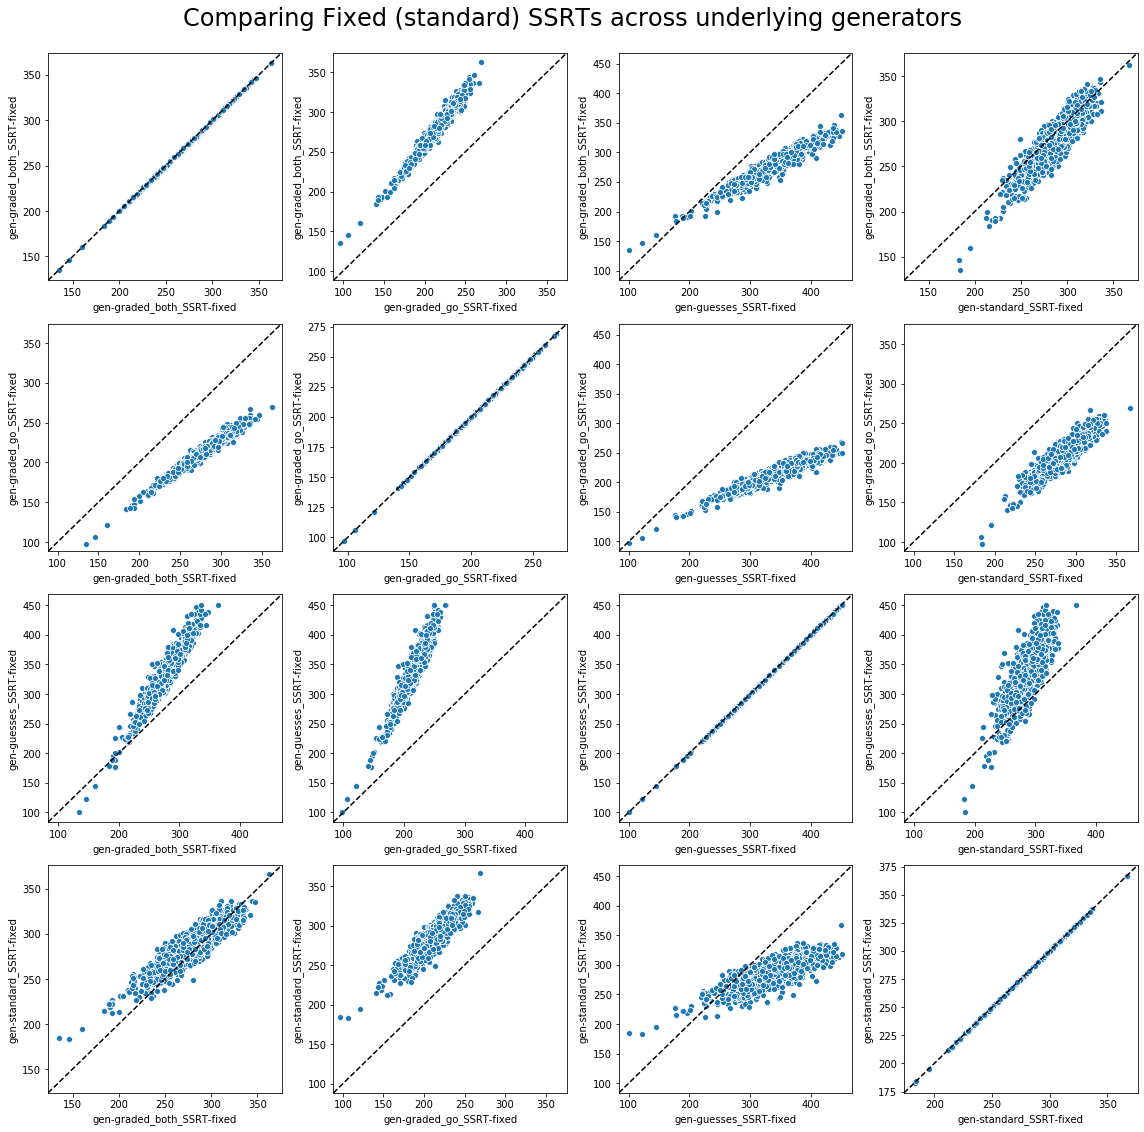

In [16]:
curr_df = monster_df.filter(regex='fixed')

fig, axes = plt.subplots(4, 4, figsize=(16,16))

for idx,coli in enumerate(curr_df.columns):
    for jdx, colj in enumerate(curr_df.columns):
        ax = sns.scatterplot(x=colj, y=coli, data=curr_df, ax=axes[idx, jdx])
        ax = make_plot_square(ax)
        _ = add_identity(ax, color='k', ls='--')
_ = fig.suptitle('Comparing Fixed (standard) SSRTs across underlying generators', fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=0.94)

In [17]:
curr_df.corr(method='spearman')

,gen-graded_both_SSRT-fixed,gen-graded_go_SSRT-fixed,gen-guesses_SSRT-fixed,gen-standard_SSRT-fixed
gen-graded_both_SSRT-fixed,1.000000,0.978906,0.954689,0.895812
gen-graded_go_SSRT-fixed,0.978906,1.000000,0.946630,0.898251
gen-guesses_SSRT-fixed,0.954689,0.946630,1.000000,0.774362
gen-standard_SSRT-fixed,0.895812,0.898251,0.774362,1.000000


## (not rescaling the axes to get a closer look)

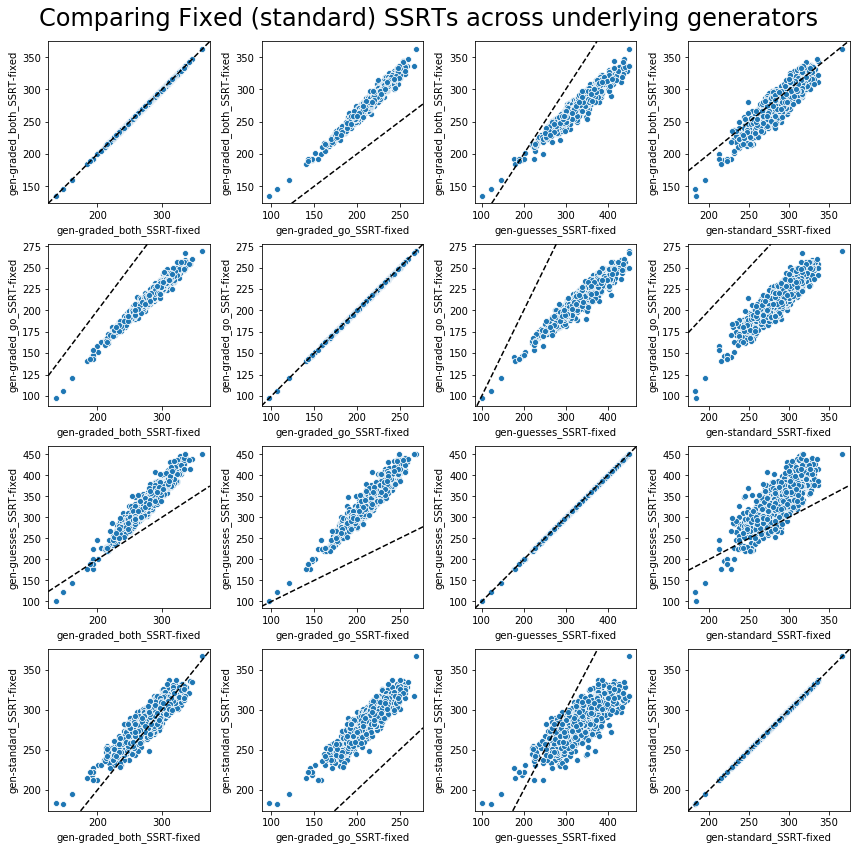

In [20]:
curr_df = monster_df.filter(regex='fixed')
fig, axes = plt.subplots(4, 4, figsize=(12,12))

for idx,coli in enumerate(curr_df.columns):
    for jdx, colj in enumerate(curr_df.columns):
        ax = sns.scatterplot(x=colj, y=coli, data=curr_df, ax=axes[idx, jdx])
#         ax = make_plot_square(ax)
        _ = add_identity(ax, color='k', ls='--')
_ = fig.suptitle('Comparing Fixed (standard) SSRTs across underlying generators', fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=0.94)

# Weighted SSRTs (from randomly assigned SSD distributions)

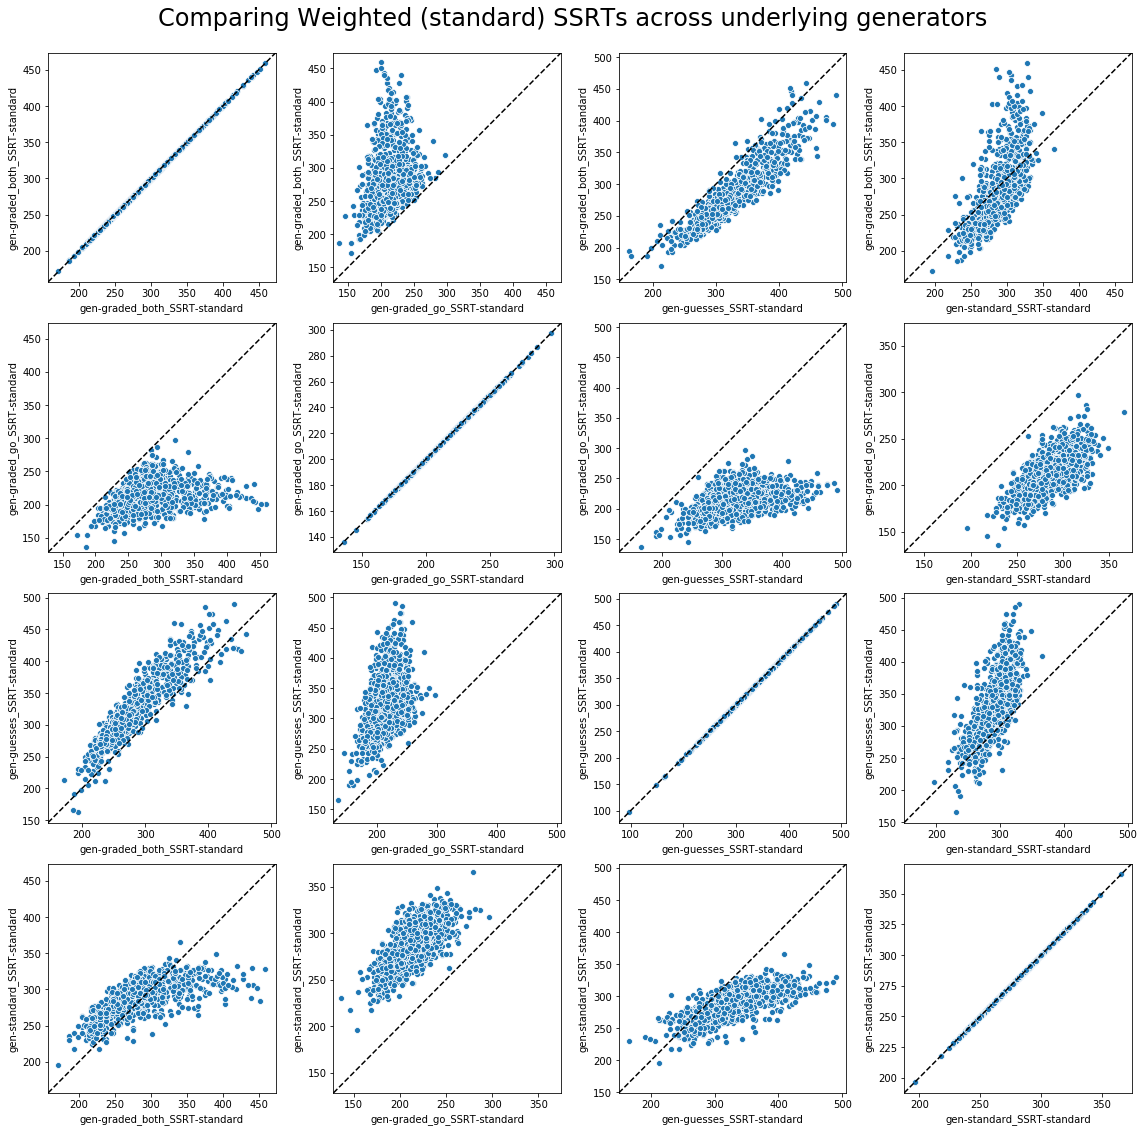

In [21]:
curr_df = monster_df.filter(regex='SSRT-standard')

fig, axes = plt.subplots(4, 4, figsize=(16,16))

for idx,coli in enumerate(curr_df.columns):
    for jdx, colj in enumerate(curr_df.columns):
        ax = sns.scatterplot(x=colj, y=coli, data=curr_df, ax=axes[idx, jdx])
        ax = make_plot_square(ax)
        _ = add_identity(ax, color='k', ls='--')
_ = fig.suptitle('Comparing Weighted (standard) SSRTs across underlying generators', fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=0.94)

In [22]:
curr_df.corr(method='spearman')

,gen-graded_both_SSRT-standard,gen-graded_go_SSRT-standard,gen-guesses_SSRT-standard,gen-standard_SSRT-standard
gen-graded_both_SSRT-standard,1.000000,0.410837,0.928353,0.750959
gen-graded_go_SSRT-standard,0.410837,1.000000,0.464785,0.672220
gen-guesses_SSRT-standard,0.928353,0.464785,1.000000,0.729106
gen-standard_SSRT-standard,0.750959,0.672220,0.729106,1.000000


## not rescaling axis to get a closer look

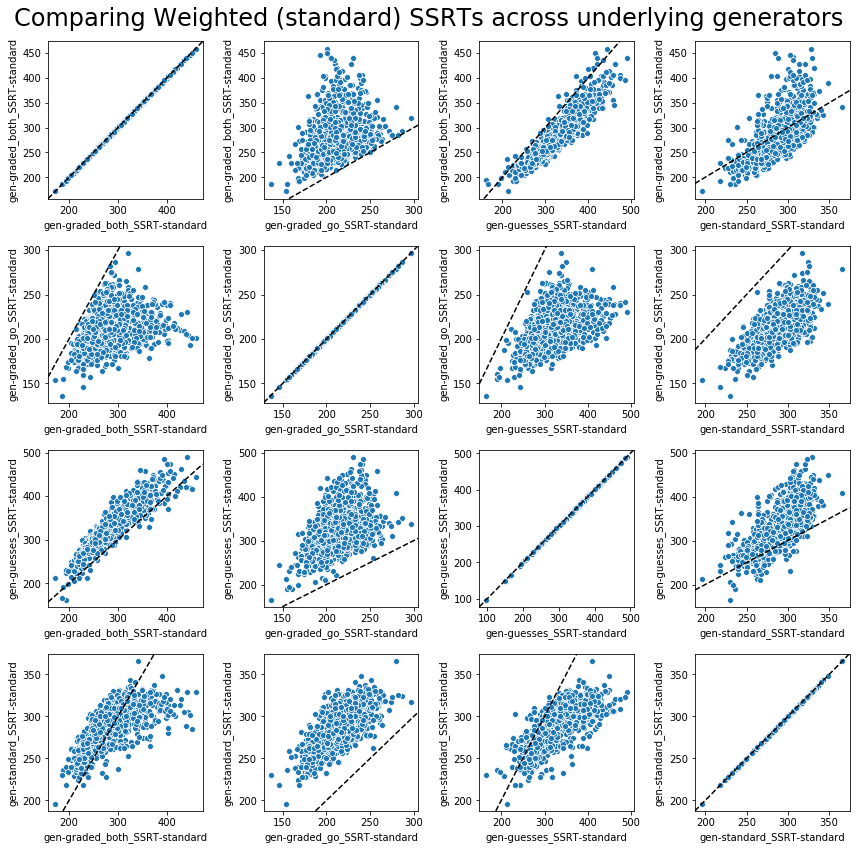

In [23]:
fig, axes = plt.subplots(4, 4, figsize=(12,12))

for idx,coli in enumerate(curr_df.columns):
    for jdx, colj in enumerate(curr_df.columns):
        ax = sns.scatterplot(x=colj, y=coli, data=curr_df, ax=axes[idx, jdx])
#         ax = make_plot_square(ax)
        _ = add_identity(ax, color='k', ls='--')
_ = fig.suptitle('Comparing Weighted (standard) SSRTs across underlying generators', fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=0.94)

# Tracking-based SSRTs

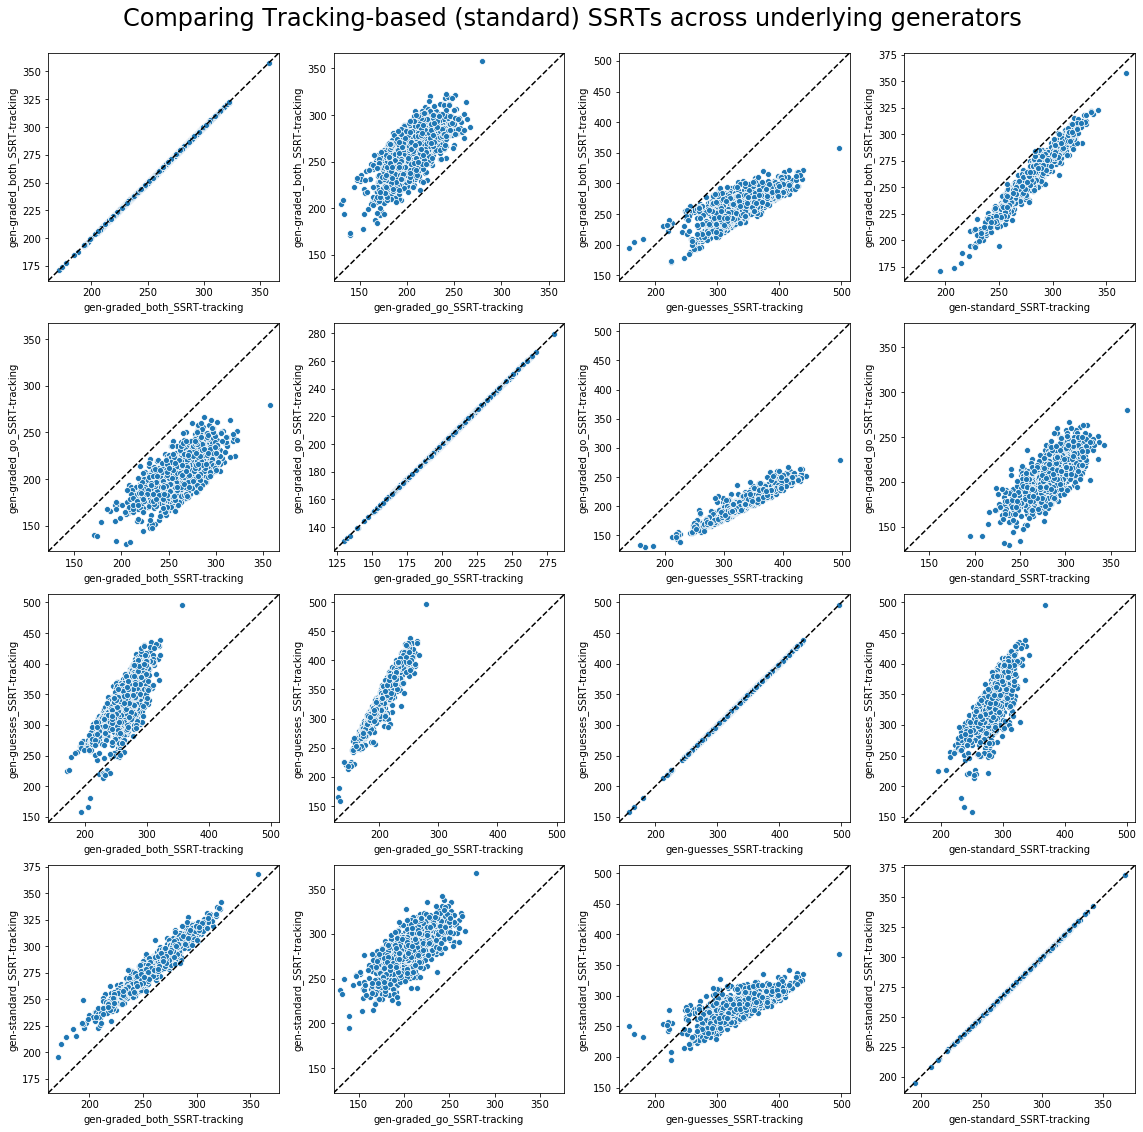

In [24]:
curr_df = monster_df.filter(regex='SSRT-tracking')

fig, axes = plt.subplots(4, 4, figsize=(16,16))

for idx,coli in enumerate(curr_df.columns):
    for jdx, colj in enumerate(curr_df.columns):
        ax = sns.scatterplot(x=colj, y=coli, data=curr_df, ax=axes[idx, jdx])
        ax = make_plot_square(ax)
        _ = add_identity(ax, color='k', ls='--')
_ = fig.suptitle('Comparing Tracking-based (standard) SSRTs across underlying generators', fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=0.94)

In [25]:
curr_df.corr(method='spearman')

,gen-graded_both_SSRT-tracking,gen-graded_go_SSRT-tracking,gen-guesses_SSRT-tracking,gen-standard_SSRT-tracking
gen-graded_both_SSRT-tracking,1.000000,0.676881,0.738670,0.963274
gen-graded_go_SSRT-tracking,0.676881,1.000000,0.949560,0.708058
gen-guesses_SSRT-tracking,0.738670,0.949560,1.000000,0.774305
gen-standard_SSRT-tracking,0.963274,0.708058,0.774305,1.000000


## not rescaling axes

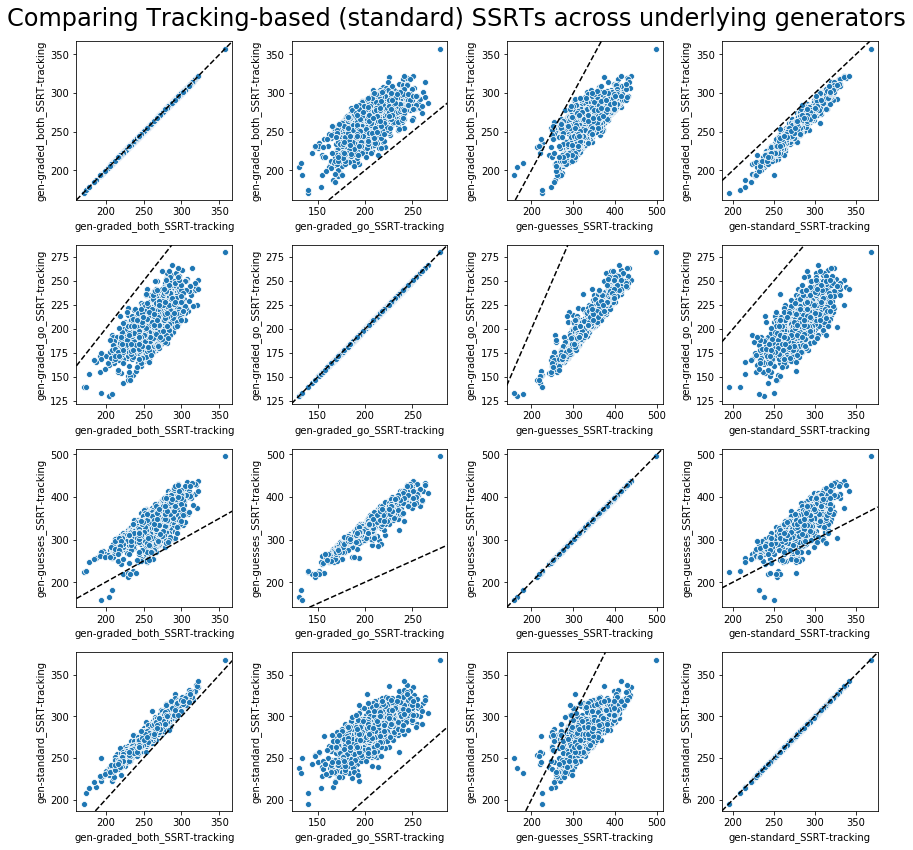

In [27]:
fig, axes = plt.subplots(4, 4, figsize=(12,12))

for idx,coli in enumerate(curr_df.columns):
    for jdx, colj in enumerate(curr_df.columns):
        ax = sns.scatterplot(x=colj, y=coli, data=curr_df, ax=axes[idx, jdx])
#         ax = make_plot_square(ax)
        _ = add_identity(ax, color='k', ls='--')
_ = fig.suptitle('Comparing Tracking-based (standard) SSRTs across underlying generators', fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=0.94)

In [28]:
main_cols = ['assigned_SSRT',
             'gen-graded_both_SSRT-standard',
             'gen-graded_go_SSRT-standard',
             'gen-guesses_SSRT-standard',
             'gen-standard_SSRT-standard',
             'gen-graded_both_SSRT-fixed',
             'gen-graded_go_SSRT-fixed',
             'gen-guesses_SSRT-fixed',
             'gen-standard_SSRT-fixed',
             'gen-graded_both_SSRT-tracking',
             'gen-graded_go_SSRT-tracking',
             'gen-guesses_SSRT-tracking',
             'gen-standard_SSRT-tracking']
monster_df[main_cols].describe()

,assigned_SSRT,gen-graded_both_SSRT-standard,gen-graded_go_SSRT-standard,gen-guesses_SSRT-standard,gen-standard_SSRT-standard,gen-graded_both_SSRT-fixed,gen-graded_go_SSRT-fixed,gen-guesses_SSRT-fixed,gen-standard_SSRT-fixed,gen-graded_both_SSRT-tracking,gen-graded_go_SSRT-tracking,gen-guesses_SSRT-tracking,gen-standard_SSRT-tracking
count,1151.000000,1147.000000,1148.000000,1151.000000,1146.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000
mean,301.502549,277.003600,213.865782,319.981047,286.918068,276.508254,212.102520,333.264987,285.172024,260.446701,205.778162,335.551056,281.313790
std,25.228028,43.588469,21.211977,47.783851,22.052212,27.470548,20.455039,45.592698,22.159617,24.348922,21.656829,40.121263,21.795118
min,209.254824,171.454545,136.183333,97.083333,196.018182,135.000000,97.000000,101.000000,183.000000,171.060000,129.990000,158.188000,195.304000
25%,285.454865,247.493939,199.258333,288.116667,271.900000,258.000000,198.500000,303.500000,271.000000,246.205000,191.554000,308.214000,266.800000
50%,302.520421,268.983333,213.058333,313.683333,286.950000,278.000000,214.000000,336.000000,286.000000,261.470000,206.360000,336.806000,281.748000
75%,319.013850,294.258333,227.820833,345.828682,302.442049,295.000000,226.000000,364.000000,300.000000,278.039000,219.808000,363.307000,296.467000
max,403.580206,459.133333,297.096774,490.333333,366.050000,363.000000,269.000000,451.000000,367.000000,357.466000,279.644000,496.430000,368.058000


In [31]:
df.corr(method='spearman')

,gen-graded_both_SSRT-standard,gen-graded_go_SSRT-standard.1,gen-guesses_SSRT-standard.2,gen-standard_SSRT-standard.3,gen-graded_both_SSRT-guesses,gen-graded_go_SSRT-guesses.1,gen-guesses_SSRT-guesses.2,gen-standard_SSRT-guesses.3,gen-graded_both_SSRT-graded_go,gen-graded_go_SSRT-graded_go.1,...,gen-guesses_SSRT-graded_both.2,gen-standard_SSRT-graded_both.3,gen-graded_both_SSRT-fixed,gen-graded_go_SSRT-fixed.1,gen-guesses_SSRT-fixed.2,gen-standard_SSRT-fixed.3,gen-graded_both_SSRT-tracking,gen-graded_go_SSRT-tracking.1,gen-guesses_SSRT-tracking.2,gen-standard_SSRT-tracking.3
gen-graded_both_SSRT-standard,1.000000,0.410837,0.928353,0.750959,0.503261,-0.441959,0.647832,-0.293682,0.813119,0.724205,...,0.843207,0.702774,0.665095,0.664442,0.616613,0.642617,0.496245,0.662394,0.653237,0.514542
gen-graded_go_SSRT-standard.1,0.410837,1.000000,0.464785,0.672220,0.384067,0.514765,0.712786,0.303503,-0.057200,0.623718,...,-0.012412,-0.025129,0.848965,0.864672,0.775191,0.854744,0.686928,0.858710,0.868972,0.710766
gen-guesses_SSRT-standard.2,0.928353,0.464785,1.000000,0.729106,0.282354,-0.443064,0.643328,-0.386462,0.709121,0.683202,...,0.794141,0.585746,0.773694,0.774979,0.771633,0.691693,0.459243,0.764682,0.737121,0.485309
gen-standard_SSRT-standard.3,0.750959,0.672220,0.729106,1.000000,0.675904,0.041184,0.940793,0.255802,0.529815,0.949070,...,0.553595,0.638638,0.755237,0.760843,0.605101,0.918620,0.883170,0.792578,0.837490,0.893854
gen-graded_both_SSRT-guesses,0.503261,0.384067,0.282354,0.675904,1.000000,0.204305,0.677978,0.509584,0.417760,0.704002,...,0.329490,0.581314,0.272722,0.283782,0.092485,0.514627,0.708686,0.325434,0.403117,0.697924
gen-graded_go_SSRT-guesses.1,-0.441959,0.514765,-0.443064,0.041184,0.204305,1.000000,0.179900,0.794149,-0.701912,0.026807,...,-0.743327,-0.505287,0.106340,0.115130,0.016745,0.230557,0.330211,0.133786,0.186724,0.326742
gen-guesses_SSRT-guesses.2,0.647832,0.712786,0.643328,0.940793,0.677978,0.179900,1.000000,0.376713,0.420048,0.945347,...,0.441742,0.558561,0.735648,0.740654,0.579276,0.907882,0.929268,0.780180,0.834201,0.942682
gen-standard_SSRT-guesses.3,-0.293682,0.303503,-0.386462,0.255802,0.509584,0.794149,0.376713,1.000000,-0.329019,0.284886,...,-0.410681,-0.026162,-0.028430,-0.020722,-0.204653,0.264234,0.554918,0.035046,0.117418,0.531192
gen-graded_both_SSRT-graded_go,0.813119,-0.057200,0.709121,0.529815,0.417760,-0.701912,0.420048,-0.329019,1.000000,0.566860,...,0.974964,0.905465,0.244303,0.252366,0.192381,0.295051,0.299295,0.257789,0.263358,0.299917
gen-graded_go_SSRT-graded_go.1,0.724205,0.623718,0.683202,0.949070,0.704002,0.026807,0.945347,0.284886,0.566860,1.000000,...,0.581581,0.694586,0.682392,0.695925,0.519709,0.861952,0.896881,0.728253,0.778083,0.903713


In [32]:
# monster_df[main_cols].loc[monster_df['gen-graded_both_SSRT-standard'].notnull()].to_csv('simulation_mainSSRTs_scale0.csv')
len(monster_df[main_cols].loc[monster_df['gen-graded_both_SSRT-standard'].notnull()])

1147

# Plot graded Mu Go function

In [ ]:
SSDs = np.arange(0,650, 5)

simulator = SimulateData()
mu_gos = [[i, simulator._log_grade_mu(1, i)] for i in SSDs]

In [ ]:
fig,ax = plt.subplots(1,1, figsize=(14, 6))

_ = sns.lineplot(x='SSD', y='MU go', color='k', data=pd.DataFrame(mu_gos, columns=['SSD', 'MU go']))
plt.savefig('figures/graded_mu_go_function.png')

In [ ]:
monster_df.index.unique()